### Analysis of transects
First we are going to analyse transects from the individuals logs whihc are generated at the end of each batch run, so technocally for each environment we only have 30 individual logs and they all refer to a point in time in the iteration which correspond to iteration =  50000


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import re

In [2]:
# define folder path
folder_path = '/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/1over50/mh'

# create an empty list
individuals_logs = []

for filename in os.listdir(folder_path):
    match = re.match(r'REvoSim_individuals_data_(\d+).txt', filename)
    if match:
        file_path = os.path.join(folder_path, filename)
        # import file 
        df = pd.read_csv(file_path, sep=',', header=0, skiprows=12)
        # take all the records that have y = 50 (a transect in the middle)
        df = df[df['Y coord'] == 50]
        df = df[['X coord', 'species ID']]
        species_count = df.groupby('X coord')['species ID'].nunique().reset_index()
        species_count['batch_num'] = f'batch{match.group(1)}'

        individuals_logs.append(species_count)
print(individuals_logs)



[    X coord  species ID batch_num
0         0           1    batch4
1         1           1    batch4
2         2           1    batch4
3         3           1    batch4
4         4           1    batch4
..      ...         ...       ...
95       95           1    batch4
96       96           1    batch4
97       97           1    batch4
98       98           1    batch4
99       99           1    batch4

[100 rows x 3 columns],     X coord  species ID batch_num
0         0           2   batch16
1         1           2   batch16
2         2           1   batch16
3         3           2   batch16
4         4           1   batch16
..      ...         ...       ...
95       95           1   batch16
96       96           3   batch16
97       97           2   batch16
98       98           5   batch16
99       99           4   batch16

[100 rows x 3 columns],     X coord  species ID batch_num
0         0           1   batch17
1         1           1   batch17
2         2           1   batch

        X coord  species ID
913           0        1290
914           0        1290
915           0        1290
916           0        1290
917           0        1290
...         ...         ...
191604       99         694
191605       99         694
191606       99         694
191607       99         694
191608       99         694

[1939 rows x 2 columns]
    X coord  species ID
0         0           2
1         1           3
2         2           3
3         3           1
4         4           1
..      ...         ...
95       95           4
96       96           5
97       97           3
98       98           2
99       99           1

[100 rows x 2 columns]


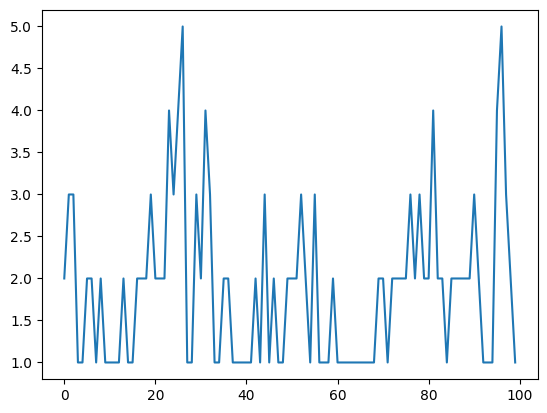

In [4]:
# load one of the 30 txt file to check what is the structure 
df = pd.read_csv('/Users/gb4818/Library/CloudStorage/OneDrive-ImperialCollegeLondon/Rev-res-in/1st batches - multichannel env/1over50/mh/REvoSim_individuals_data_1.txt', sep = ',', header = 0, skiprows = 12)


# take all the records that have y = 50 (a transect in the middle)
df = df[df['Y coord'] == 50]
df = df[['X coord','species ID']]
print(df)

# Calculate the number of unique species for each x coordinate
species_count = df.groupby('X coord')['species ID'].nunique().reset_index()
print(species_count)

plt.plot(species_count['X coord'], species_count['species ID'])